# Predicting Heart Disease using Machine Learning

The notebook contains the source code on how the data has been explored and choosing the right algorithm to determine if a patient has heart disease or not.The model uses python as it's primary programming language along with libraries like pandas, numpy, matplotlib and sklearn.

Contents provided :
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

Given the medical parameters, define if the patient has been conflicted with heart disease or not.

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

## 3. Evaluation

If we can predict 95% of the data accurately whether the patient has heart disease or not, we pursue the project

## 4. Features

The variables that defines the success of the prediction, exploration of these variable enhances the probablity of increased accuracy or performance. The following features are described below:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Importing Libraries

In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Load the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

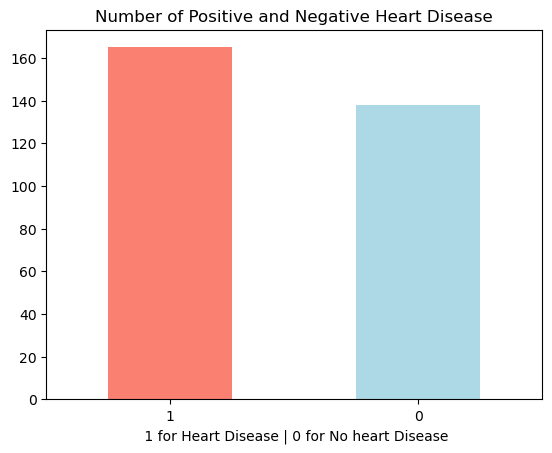

In [5]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"])
plt.title("Number of Positive and Negative Heart Disease")
plt.xlabel(" 1 for Heart Disease | 0 for No heart Disease")
plt.xticks(rotation = 0)

### Heart Disease frequency based on gender

In [6]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


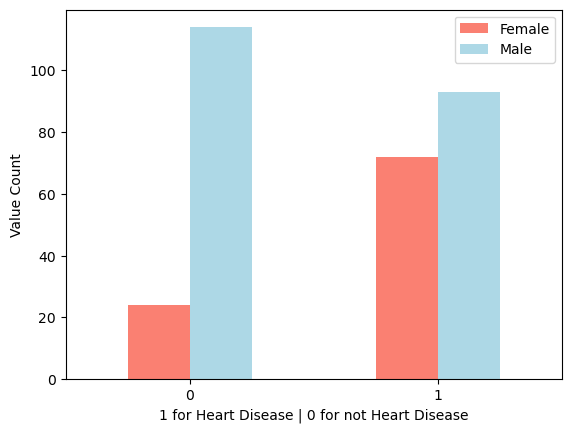

In [8]:
pd.crosstab(df["target"], df["sex"]).plot(kind = "bar", color = ["Salmon", "Lightblue"])
plt.xticks(rotation = 0)
plt.xlabel("1 for Heart Disease | 0 for not Heart Disease")
plt.ylabel("Value Count");
plt.legend(["Female", "Male"]);

### Age vs Max Heart Rate

In [9]:
df[["thalach", "age"]].head()

,thalach,age
0,150,63
1,187,37
2,172,41
3,178,56
4,163,57


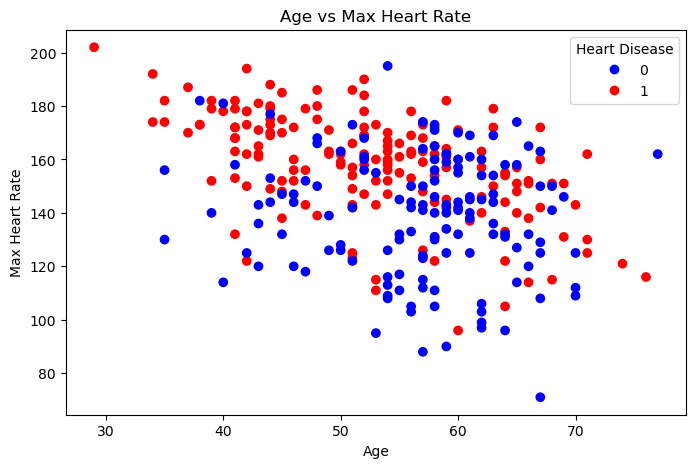

In [10]:
fig, ax = plt.subplots(figsize = (8, 5))
scat_plot = ax.scatter(x = df["age"], y= df["thalach"], c = df["target"], cmap = "bwr")
ax.legend(*scat_plot.legend_elements(), title = "Heart Disease");
ax.set(title = "Age vs Max Heart Rate", xlabel = "Age", ylabel = "Max Heart Rate");

In [11]:
x = df["age"][df["target"] == 0]
y = df["thalach"][df["target"] == 0]
x1 = df.age[df["target"] == 1]
y1 = df.thalach[df["target"] == 1]
x.size, y.size

(138, 138)

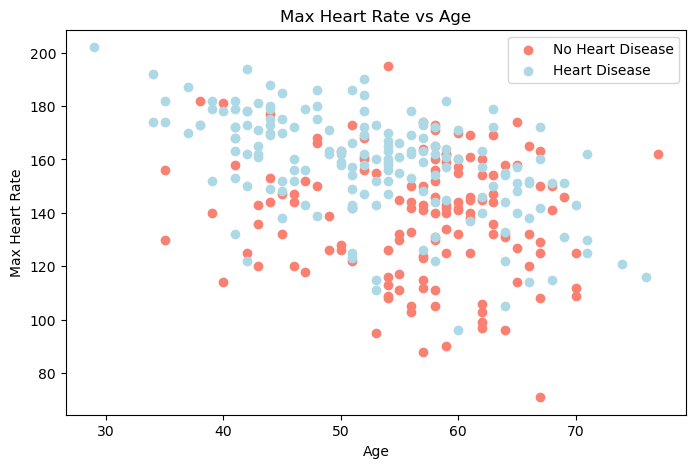

In [12]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(x, y, color = "Salmon", label = "No Heart Disease")
ax.scatter(x1, y1, color = "lightblue", label = "Heart Disease")
ax.legend()
ax.set(title = "Max Heart Rate vs Age", xlabel = "Age", ylabel = "Max Heart Rate");

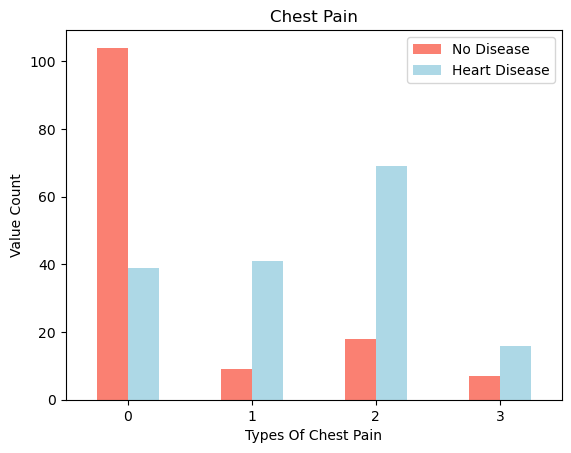

In [13]:
# chest pain type vs target
pd.crosstab(df.cp, df.target).plot(kind = "bar", color = ["Salmon", "lightblue"])
plt.legend(["No Disease", "Heart Disease"])
plt.title("Chest Pain")
plt.xlabel("Types Of Chest Pain")
plt.ylabel("Value Count")
plt.xticks(rotation = 0);

In [14]:
cor_matrix = df.corr()
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


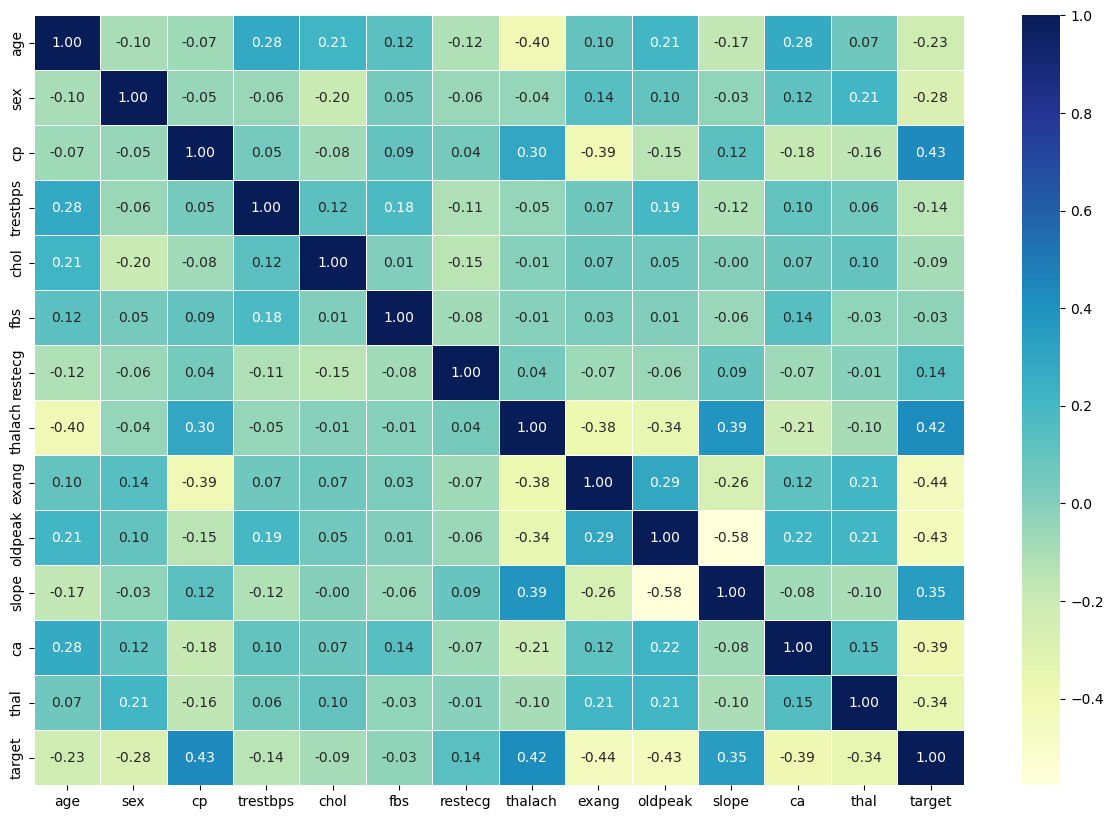

In [15]:
#correaltion matrix
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(cor_matrix, annot = True, cmap = "YlGnBu", linewidths= 0.5, fmt = ".2f");

## Modelling

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# train and test split
# X for features, y for target/label

X = df.drop("target", axis = 1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [20]:
X_train.shape, y_train.shape

((242, 13), (242,))

In [32]:
# choosing the estimator for classification
model = {"Logistic Regression" : LogisticRegression(),
        "KNN" : KNeighborsClassifier(),
        "Random Forest Classifier" : RandomForestClassifier()}

def model_fit_and_score(model, X_train, y_train, X_test, y_test):
    np.random.seed(seed = 40)
    model_score = {}
    for keys, value in model.items():
        value.fit(X_train, y_train)
        model_score[keys] = value.score(X_test, y_test)
    return model_score


In [35]:
model_score = model_fit_and_score(model, X_train, y_train, X_test, y_test)

D:\job\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
model_score

{'Logistic Regression': 0.7540983606557377,
 'KNN': 0.5737704918032787,
 'Random Forest Classifier': 0.7049180327868853}

### Model Comparison

In [57]:
model_compare = pd.DataFrame(model_score.values(), index = model_score.keys(), columns= ["Score"])
model_compare

,Score
Logistic Regression,0.754098
KNN,0.573770
Random Forest Classifier,0.704918


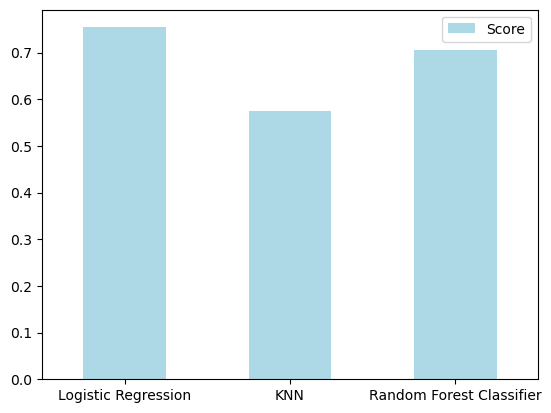

In [58]:
model_compare.plot(kind = "bar", color = ["lightblue"])
plt.xticks(rotation = 0);

We have acquired the score[accuracy] of all the three estimators but the score isn't good so we will tune the model to perform better
* Hyper-parameter tuning


### Hyperparameter Tuning [Manual]

In [67]:
# Tuning KNN model

knn = KNeighborsClassifier()

neighbours = np.arange(1, 20)
train_score = []
test_score = []

for i in neighbours:
    np.random.seed(seed = 40)
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

knn_score = pd.DataFrame(train_score, columns= ["Train Score"])
knn_score["Test Score"] = test_score
knn_score

,Train Score,Test Score
0,1.000000,0.540984
1,0.809917,0.573770
2,0.814050,0.590164
3,0.797521,0.622951
4,0.826446,0.573770
5,0.797521,0.622951
6,0.760331,0.573770
7,0.743802,0.606557
8,0.735537,0.557377
9,0.727273,0.590164


Maximum test score obtained 62.30%


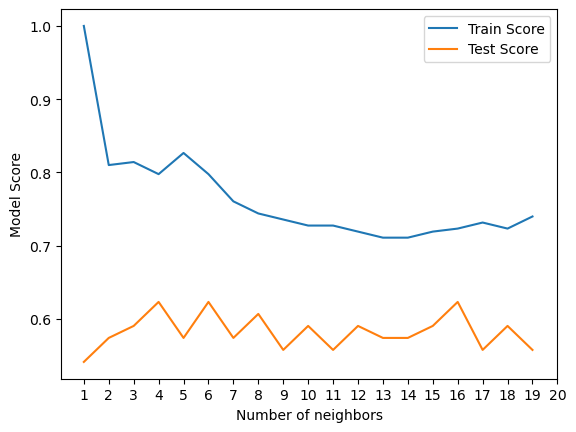

In [81]:
plt.plot(neighbours, train_score)
plt.plot(neighbours, test_score)
plt.xticks(np.arange(1,21));
plt.legend(["Train Score", "Test Score"]);
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
print(f"Maximum test score obtained {max(test_score)*100:.2f}%")

Discarding KNN as it doesn't show any promosing score

## Hyperparameter Tuning Using RandomSearch CV

RandomsearchCV for Logisitic Regression and RandomForestClassifier

In [90]:
# Set Parameter
rs_log_param = {"C" : np.logspace(4, 4, 20),
            "solver" : ["liblinear"]}

rs_rf_param = {"n_estimators": np.arange(10, 1000, 50),
              "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [92]:
# RandomSearch CV for Logistic Regression
np.random.seed(seed = 40)
rs_logr = RandomizedSearchCV(LogisticRegression(), cv = 5, param_distributions = rs_log_param, n_iter = 20, verbose = True)
rs_logr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000.]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [93]:
rs_logr.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [97]:
rs_logr_score = rs_logr.score(X_test, y_test)
rs_logr_score

0.7540983606557377

In [98]:
#RandomSearch CV for RandomForest
np.random.seed(seed = 40)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions = rs_rf_param, 
                           cv = 5, n_iter = 20, verbose = True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [99]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 6,
 'min_samples_leaf': 13,
 'max_depth': 5}

In [101]:
rs_rf_score = rs_rf.score(X_test, y_test)
rs_rf_score

0.7213114754098361

### Hyperparameter Tuning GridsearchCV

In [102]:
gs_logr_param = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}


In [103]:
np.random.seed(seed = 40)

gs_logr = GridSearchCV(LogisticRegression(), param_grid = gs_logr_param, cv = 5, verbose = True)

#fit the model
gs_logr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [104]:
gs_logr.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [106]:
gs_logr_score = gs_logr.score(X_test, y_test)
gs_logr_score

0.7540983606557377

## Evaluating the Model

Evaluating the model beyond accuracy is to display a detailed performance of the model.
* ROC/AUC Curve
* Confusion Matrix
* Classification Report
* Cross Validation using different parameter

### ROC-AUC Curve

In [109]:
y_prob = gs_logr.predict_proba(X_test)
y_prob

array([[0.95264494, 0.04735506],
       [0.0204582 , 0.9795418 ],
       [0.28026356, 0.71973644],
       [0.22747513, 0.77252487],
       [0.9520103 , 0.0479897 ],
       [0.24470575, 0.75529425],
       [0.95823883, 0.04176117],
       [0.09324711, 0.90675289],
       [0.83578221, 0.16421779],
       [0.17972882, 0.82027118],
       [0.6556092 , 0.3443908 ],
       [0.22355128, 0.77644872],
       [0.08141269, 0.91858731],
       [0.97467251, 0.02532749],
       [0.44522102, 0.55477898],
       [0.2352333 , 0.7647667 ],
       [0.99875992, 0.00124008],
       [0.98337904, 0.01662096],
       [0.99352541, 0.00647459],
       [0.06068424, 0.93931576],
       [0.70857269, 0.29142731],
       [0.05025114, 0.94974886],
       [0.45149665, 0.54850335],
       [0.24319613, 0.75680387],
       [0.47448085, 0.52551915],
       [0.06423116, 0.93576884],
       [0.98354934, 0.01645066],
       [0.87575119, 0.12424881],
       [0.04290883, 0.95709117],
       [0.43197665, 0.56802335],
       [0.

In [118]:
y_prob_true = y_prob[:, 1]
y_prob_true

array([0.04735506, 0.9795418 , 0.71973644, 0.77252487, 0.0479897 ,
       0.75529425, 0.04176117, 0.90675289, 0.16421779, 0.82027118,
       0.3443908 , 0.77644872, 0.91858731, 0.02532749, 0.55477898,
       0.7647667 , 0.00124008, 0.01662096, 0.00647459, 0.93931576,
       0.29142731, 0.94974886, 0.54850335, 0.75680387, 0.52551915,
       0.93576884, 0.01645066, 0.12424881, 0.95709117, 0.56802335,
       0.62509476, 0.80136655, 0.08754121, 0.85647914, 0.98534927,
       0.22826291, 0.35348635, 0.00709331, 0.89326347, 0.71391898,
       0.71767104, 0.68691197, 0.50175435, 0.64387433, 0.93834585,
       0.94604352, 0.85334602, 0.92554501, 0.07356448, 0.75826901,
       0.86777419, 0.88403584, 0.93281752, 0.66483282, 0.21997292,
       0.35364924, 0.36413872, 0.53787543, 0.92905428, 0.05784806,
       0.02382042])

In [119]:
fpr, tpr, threshold = roc_curve(y_test, y_prob_true)

In [120]:
fpr, tpr, threshold

(array([0.        , 0.        , 0.        , 0.03030303, 0.03030303,
        0.06060606, 0.06060606, 0.09090909, 0.09090909, 0.12121212,
        0.12121212, 0.15151515, 0.15151515, 0.21212121, 0.21212121,
        0.24242424, 0.24242424, 0.33333333, 0.33333333, 0.36363636,
        0.36363636, 0.57575758, 0.57575758, 1.        ]),
 array([0.        , 0.03571429, 0.07142857, 0.07142857, 0.25      ,
        0.25      , 0.32142857, 0.32142857, 0.46428571, 0.46428571,
        0.60714286, 0.60714286, 0.67857143, 0.67857143, 0.75      ,
        0.75      , 0.78571429, 0.78571429, 0.89285714, 0.89285714,
        0.92857143, 0.92857143, 1.        , 1.        ]),
 array([1.98534927e+00, 9.85349268e-01, 9.79541797e-01, 9.57091174e-01,
        9.35768838e-01, 9.32817518e-01, 9.25545012e-01, 9.18587308e-01,
        8.67774190e-01, 8.56479138e-01, 7.76448724e-01, 7.72524875e-01,
        7.58269011e-01, 7.55294251e-01, 7.17671040e-01, 7.13918975e-01,
        6.86911974e-01, 6.25094757e-01, 5.48503350e-

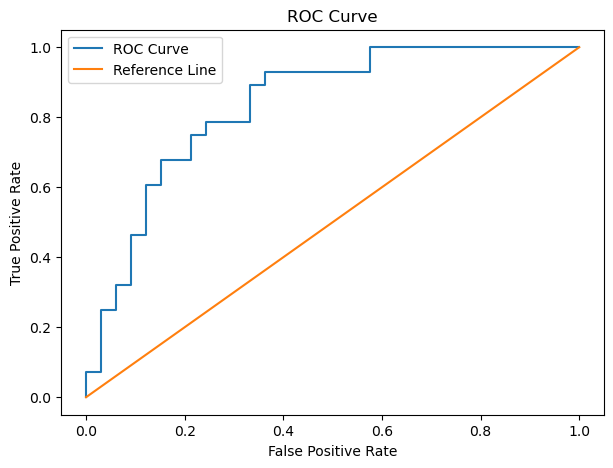

In [145]:
fig, ax = plt.subplots(figsize = (7, 5))
ax.plot(fpr, tpr)
ax.plot([0,1], [0,1])
ax.set(xlabel= "False Positive Rate", ylabel = "True Positive Rate", title = "ROC Curve")
ax.legend(["ROC Curve", "Reference Line"]);

In [135]:
roc_auc_score(y_test, y_prob_true)

0.8354978354978355

### Confusion Matrix

In [170]:
y_preds = gs_logr.predict(X_test)
cm_score = confusion_matrix(y_test, y_preds)
cm_score

array([[20, 13],
       [ 2, 26]], dtype=int64)

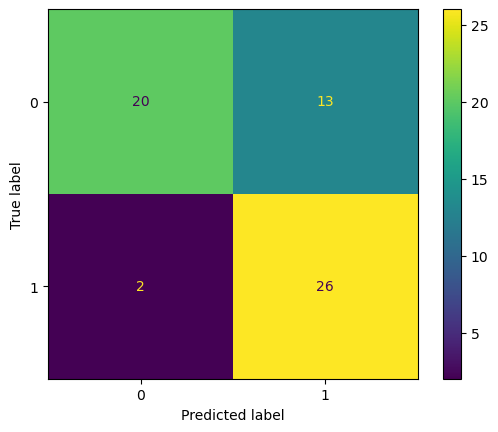

In [172]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

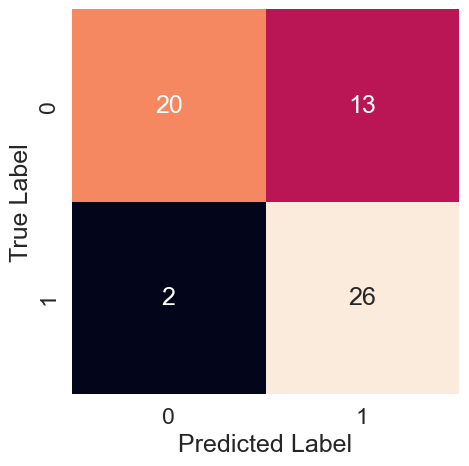

In [183]:
sns.set(font_scale = 1.5)
fig , ax = plt.subplots(figsize = (5, 5))
ax = sns.heatmap(cm_score, annot= True, cbar = False)
ax.set(xlabel = "Predicted Label", ylabel = "True Label");